# Data import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Deduplicated_Artists_and_Albums_Dataset.csv')
ncols, nrows = df.shape
print(ncols, nrows)
df.head()

62779 21


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,105831,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,pagadoff,5,135860,False,0.784,0.657,...,-7.591,0,0.3480,0.332,0.00362,0.131,0.501,84.997,4,study
1,105160,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,strolling,41,138875,False,0.857,0.381,...,-12.755,1,0.1920,0.666,0.01910,0.126,0.329,84.997,4,study
2,14426,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,False,0.781,0.936,...,-4.709,1,0.2020,0.171,0.00141,0.202,0.873,182.148,4,children
3,18236,7afCEhjQKgWLoLOUs0TX4m,"""Weird Al"" Yankovic","""Weird Al"" Yankovic",I'll Be Mellow When I'm Dead,26,220906,False,0.661,0.714,...,-10.688,1,0.0615,0.185,0.00000,0.264,0.866,94.046,4,comedy
4,18151,5r96TaQquRrlo3Ym3ZlSL2,"""Weird Al"" Yankovic",Bad Hair Day,"Amish Paradise (Parody of ""Gangsta's Paradise""...",58,202920,False,0.728,0.448,...,-10.540,1,0.1720,0.103,0.00000,0.267,0.483,80.902,4,comedy


# Data cleaning 

In [6]:
# duplicated rows?
duplicated_rows = df.duplicated().sum()
duplicated_rows


0

There are no duplicated_rows due to the sampling the data by excel before I select the duplicate songs and duplicated ID only as there is duplicated in song but not in the popularity due to the creation of systems that allow users to create new song to add on their albums (which stated before in the definition of variables)
I delete the duplicated songs and duplicated ID just keep the unique value with the hghest marked popularity

In [7]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Drop columns unnamed due to no meaning for this analysis 

In [8]:
df.drop(columns='Unnamed: 0', inplace=True)


In [9]:
df.describe()



,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,62779.000000,6.277900e+04,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000,62779.000000
mean,34.570525,2.305172e+05,0.577439,0.637416,5.320059,-8.255833,0.626340,0.085692,0.318718,0.159813,0.205203,0.472501,122.291631,3.908855
std,21.242206,1.152191e+05,0.172126,0.249412,3.558140,5.086239,0.483779,0.099825,0.330303,0.312576,0.179544,0.259643,29.873530,0.431494
min,0.000000,1.580000e+04,0.000000,0.000000,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.756140e+05,0.469000,0.471000,2.000000,-9.942000,0.000000,0.036200,0.020100,0.000000,0.097100,0.256000,99.860000,4.000000
50%,36.000000,2.132890e+05,0.592000,0.678000,5.000000,-7.035000,1.000000,0.049300,0.180000,0.000037,0.129000,0.460000,122.504000,4.000000
75%,51.000000,2.629930e+05,0.705000,0.846000,8.000000,-5.040000,1.000000,0.087100,0.596000,0.054700,0.262000,0.683000,140.077500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.994000,220.081000,5.000000


In [10]:
df.shape

(62779, 20)

Missing Values

In [11]:
features_with_nan =[]
for feature in df.columns: 
    if df[feature].isna().sum()>0:
        features_with_nan = feature

features_with_nan
# No columns with Nan exist

[]

Dropping the duplicates

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,pagadoff,5,135860,False,0.784,0.657,11,-7.591,0,0.3480,0.332,0.00362,0.131,0.501,84.997,4,study
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,strolling,41,138875,False,0.857,0.381,2,-12.755,1,0.1920,0.666,0.01910,0.126,0.329,84.997,4,study
2,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,False,0.781,0.936,3,-4.709,1,0.2020,0.171,0.00141,0.202,0.873,182.148,4,children
3,7afCEhjQKgWLoLOUs0TX4m,"""Weird Al"" Yankovic","""Weird Al"" Yankovic",I'll Be Mellow When I'm Dead,26,220906,False,0.661,0.714,2,-10.688,1,0.0615,0.185,0.00000,0.264,0.866,94.046,4,comedy
4,5r96TaQquRrlo3Ym3ZlSL2,"""Weird Al"" Yankovic",Bad Hair Day,"Amish Paradise (Parody of ""Gangsta's Paradise""...",58,202920,False,0.728,0.448,8,-10.540,1,0.1720,0.103,0.00000,0.267,0.483,80.902,4,comedy


In [14]:
df.shape

(62779, 20)

Remove the unrealted collumn "Unnamed:0" and none of the rows has been drop (62779 21)

# Introduce new creation of varible: number of artist

In [15]:
df['artists'] = df['artists']
df['number of Artist'] = df['artists'].apply(lambda x: len(x.split(';')))
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,number of Artist
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,pagadoff,5,135860,False,0.784,0.657,11,...,0,0.3480,0.332,0.00362,0.131,0.501,84.997,4,study,1
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,strolling,41,138875,False,0.857,0.381,2,...,1,0.1920,0.666,0.01910,0.126,0.329,84.997,4,study,1
2,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,False,0.781,0.936,3,...,1,0.2020,0.171,0.00141,0.202,0.873,182.148,4,children,1
3,7afCEhjQKgWLoLOUs0TX4m,"""Weird Al"" Yankovic","""Weird Al"" Yankovic",I'll Be Mellow When I'm Dead,26,220906,False,0.661,0.714,2,...,1,0.0615,0.185,0.00000,0.264,0.866,94.046,4,comedy,1
4,5r96TaQquRrlo3Ym3ZlSL2,"""Weird Al"" Yankovic",Bad Hair Day,"Amish Paradise (Parody of ""Gangsta's Paradise""...",58,202920,False,0.728,0.448,8,...,1,0.1720,0.103,0.00000,0.267,0.483,80.902,4,comedy,1


In [ ]:
# Overview about the data
Top song Genre 


In [36]:
unique_genres = df['track_genre'].unique()
print(len(unique_genres))

113


# Q1: Market preference address by popularity

Sub question 1.1: What is the relationship between the popularity and other variables in the most popular songs (the popularity > 75):
- Selecte the most popular song (popularity >75)

In [43]:
dataset=df.copy()
filtered_data = dataset[dataset["popularity"] > 75]
filtered_data.shape

(1121, 21)

- The area is Top 10 genres with the highest number of songs


In [71]:
genre_counts = filtered_data['track_genre']g
top_genres = genre_counts.head(5)
top_genres

track_genre
dance        161
latino        85
hip-hop       66
indie-pop     62
alt-rock      62
Name: count, dtype: int64

In [72]:
# The sample data that both popular and in the top genres:
filtered_data_top_genres = filtered_data[filtered_data['track_genre'].isin(top_genres.index.tolist())]
filtered_data_top_genres


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,number of Artist
159,3NLrRZoMF0Lx6zTlYqeIo4,3 Doors Down,Away From The Sun,Here Without You,76,238733,False,0.557,0.533,10,...,0,0.0252,0.04920,0.000000,0.2050,0.233,143.994,4,alt-rock,1
164,6ZOBP3NvffbU4SZcrnt1k6,3 Doors Down,The Better Life,Kryptonite,80,233933,False,0.545,0.865,11,...,0,0.0286,0.00664,0.000011,0.1680,0.543,99.009,4,alt-rock,1
254,26wLOs3ZuHJa2Ihhx6QIE6,5 Seconds of Summer,13 Reasons Why (Season 3),Teeth,79,204887,False,0.756,0.448,3,...,0,0.0404,0.05080,0.000004,0.1100,0.431,139.031,4,dance,1
255,2iUXsYOEPhVqEBwsqP70rE,5 Seconds of Summer,Youngblood (Deluxe),Youngblood,81,203417,False,0.596,0.854,7,...,0,0.4630,0.01690,0.000000,0.1240,0.152,120.274,4,dance,1
258,7iL6o9tox1zgHpKUfh9vuC,50 Cent,Get Rich Or Die Tryin',In Da Club,83,193466,True,0.899,0.713,6,...,0,0.3660,0.25500,0.000000,0.0708,0.777,90.051,4,hip-hop,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61338,7FGq80cy8juXBCD2nrqdWU,benny blanco;Halsey;Khalid,FRIENDS KEEP SECRETS,Eastside (with Halsey & Khalid),78,170769,False,0.632,0.686,6,...,0,0.2430,0.54900,0.000000,0.2000,0.329,89.949,4,dance,3
61409,42qNWdLKCI41S4uzfamhFM,bôa,Twilight,Duvet,77,203600,False,0.583,0.888,11,...,0,0.0349,0.19100,0.000046,0.0936,0.706,93.206,4,indie-pop,1
61606,6FYfhKknpt05Om6YPcEYAg,girl in red,we fell in love in october / forget her,we fell in love in october,80,184153,False,0.566,0.366,7,...,1,0.0280,0.11300,0.181000,0.1550,0.237,129.960,4,indie-pop,1
61790,4qbEaaJ29p32GI8EWQmm6R,mazie,the rainbow cassette,dumb dumb,79,125256,False,0.783,0.472,2,...,1,0.0427,0.22000,0.000458,0.0798,0.589,122.052,4,indie-pop,1


- Numerical features

In [64]:
var_numerical=[var for var in df.columns if df[var].dtype!='O']
print(len(var_numerical))
df[var_numerical].head()


16


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,number of Artist
0,5,135860,False,0.784,0.657,11,-7.591,0,0.3480,0.332,0.00362,0.131,0.501,84.997,4,1
1,41,138875,False,0.857,0.381,2,-12.755,1,0.1920,0.666,0.01910,0.126,0.329,84.997,4,1
2,60,57789,False,0.781,0.936,3,-4.709,1,0.2020,0.171,0.00141,0.202,0.873,182.148,4,1
3,26,220906,False,0.661,0.714,2,-10.688,1,0.0615,0.185,0.00000,0.264,0.866,94.046,4,1
4,58,202920,False,0.728,0.448,8,-10.540,1,0.1720,0.103,0.00000,0.267,0.483,80.902,4,1


- The relationship between the numerical discriptive varibales vs popularity 

Selecting out the discrete features among the numerical features and finding their relationship with popularity with the sample lying in the popularity >70

In [65]:
var_discrete_num=[var for var in var_numerical if df[var].nunique()<70]
var_discrete_num

['explicit', 'key', 'mode', 'time_signature', 'number of Artist']

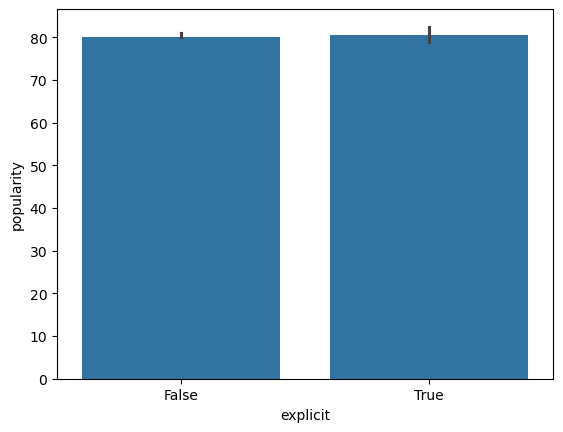

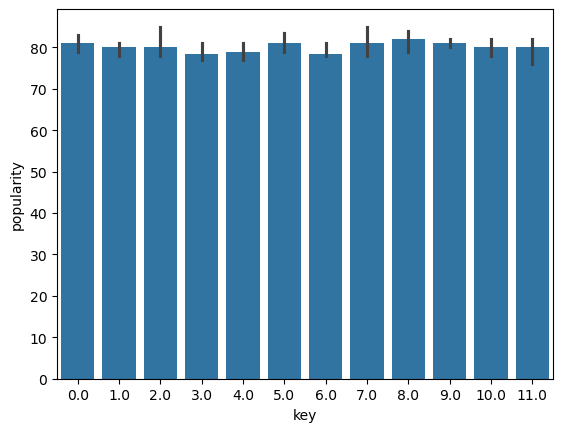

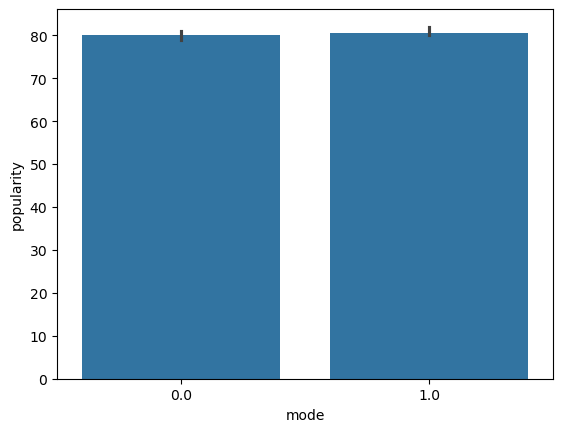

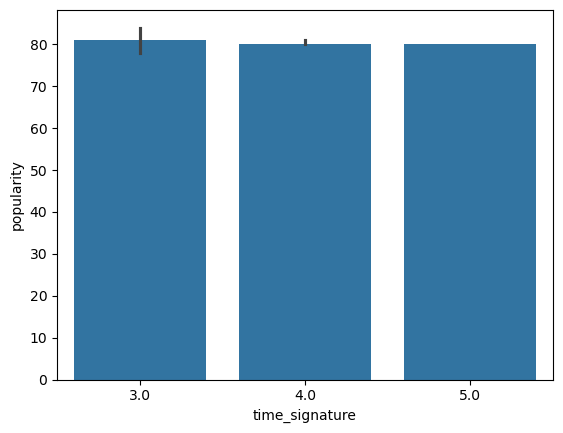

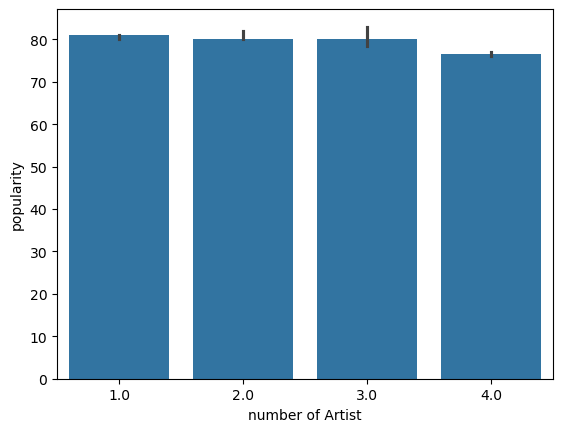

In [70]:

for var in var_discrete_num:
    data=df.copy()
    sns.barplot(x=var, y=data['popularity'], data= filtered_data_top_genres, estimator=np.median)
    plt.show()

We see that songs which contain explicit lyrics are more popular in comparision with songs that do not contain such lyrics.

The popularity of songs or tracks in different keys do not affect theirpopularity much. Songs in all the keys are almost equally popular.

The tracks in both the modes are equally popular, the major as well as the minor.

The time signature (meter) is a notational convention to specify how many beats are in each bar. The time_signature should lie between 3 to 7 as per the data dictionary time signatures of 3/4, to 7/4. But here time_signature ranges from 0 to 5. We would probably convert these in variable  selection. From the current looks, tracks having time_signature 0 and 4 are more popular than other.

- Checking the continous varibales and popularity: 

Selecting the continuouscontinuous features among the numerical features and finding their distribution

In [ ]:
correlation, p_value = pearsonr(data['danceability'], data['popularity'])
print(f"Correlation: {correlation}, P-Value: {p_value}")



In [67]:
continuos_var = [ var for var in var_numerical if var not in var_discrete_num]
continuos_var

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

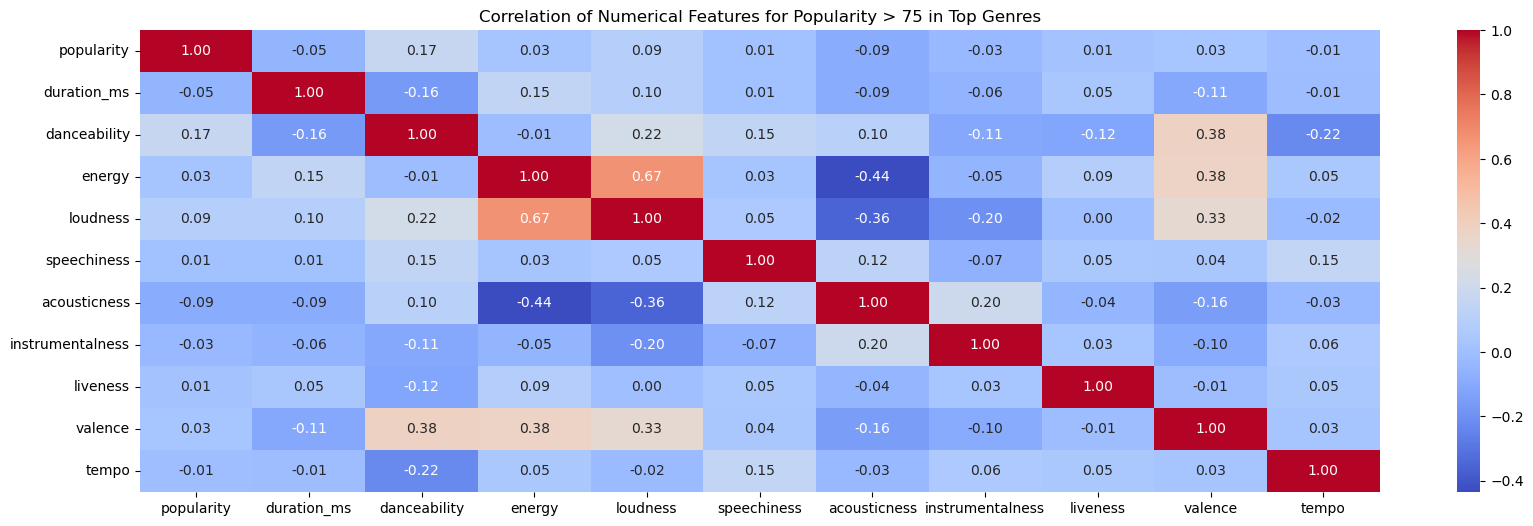

In [73]:
# The correlation matrix for data with popularity >75 within top 10 genres:
correlation_matrix = filtered_data_top_genres[continuos_var].corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Numerical Features for Popularity > 75 in Top Genres")
plt.show()

The significant in the correlation between the following variables: 

Sub question 1.2: How do different genre-related characteristics affect the popularity of songs?

Sub question 1.3: The relationship of energy, loudness and live in the top popular genres to define the trends

Q2: Music recommendation for marketing team based on market perference?

Sub question 2.1: User demographics and genre preferences.

If user demographic data is not present in your dataset, simulate insights based on track_genre trends. For example, high-energy genres may appeal to younger demographics.
Calculate the average popularity and feature distributions for each genre.

Sub-question 2.2: Identifying songs for marketing campaigns.

Analyze which audio features (danceability, valence, energy, etc.) align with higher popularity.
Use genres with positive valence, high energy, or danceability to recommend songs for ads.

Q3: Music recommendation for user: How can we suggest songs based on a user's current listening preferences 

Sub-question 3.1: Personalized playlist creation.

Cluster users (if user data is available) or songs using audio features (danceability, valence, tempo, etc.) to create playlists tailored to different moods and activities.

Sub-question 3.2: Collaborative vs. content-based filtering.

Collaborative filtering: Recommend tracks from artists or genres liked by other users.
Content-based filtering: Recommend tracks with similar danceability, valence, or other audio features.